In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.interpolate import griddata
from matplotlib.gridspec import GridSpec
import struct


V = np.genfromtxt("Meshdata/VerticesRing20.txt")
T = np.genfromtxt("Meshdata/FacesRing20.txt")

n_v = len(V)
n_t = len(T)

#for i in range(0, n_t , 1):
#        for j in range( 0, 3 , 1):
#                k = int(T[i][j])
#                l = int(T[i][(j+1)%3])
#                plt.plot( [V[k][0],V[l][0]], [V[k][1],V[l][1]] , c='black', alpha=0.4)
#for i in range(0,n_v,1):
#    plt.scatter(V[i][0],V[i][1], color='r', marker='o')
#plt.show()



Sol = np.genfromtxt("Solutions/PoissonSolutionRing20.txt")

In [5]:
def InterpolationPlot( Vertices , Values, Title, Triangulation):
    #define grid
    xi = np.linspace(0.,1.,1001)
    yi = np.linspace(0.,1.,1001)
    # grid the data
    zi = griddata( Vertices , Values, (xi[None,:], yi[:,None]), method='cubic')
    # contour the gridded data, plotting dots at the randomly spaced data points.
    CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
    CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet,alpha=0.5)
    plt.colorbar() # draw colorbar
    # plot data points.
    #plt.scatter(V[::,:1:],V[::,1::],marker='o',c='b',s=10)
    #for i in range(0, len(Triangulation) , 1):
    #    for j in range( 0, 3 , 1):
    #            k = int(Triangulation[i][j])
    #            l = int(Triangulation[i][(j+1)%3])
    #            plt.plot( [V[k][0],V[l][0]], [V[k][1],V[l][1]] , c='grey',alpha=0.5)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title(Title)

def DeleteFromMultArrays( mArr , arr, errors , tolerance):
    i = 0
    while i < len(arr):
        if (abs(errors[i])>tolerance):
            mArr = np.delete(mArr,i,0)
            arr = np.delete(arr,i)
            errors = np.delete(errors,i)
        else:
            i += 1
    NewData = (mArr, arr, errors)
    return NewData


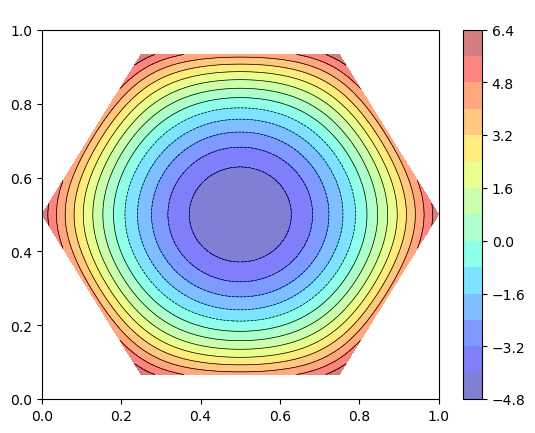

In [6]:
InterpolationPlot( V , Sol , " ", T)